IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
# Introduction to Python
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

# Setting up Your Python Environment

In [1]:
# general remark on working directory
%pwd
# same folder as jupyter notebook is located!

'C:\\Users\\daniel.heimgartner\\Desktop\\Quant Econ'

Hello

In [10]:
α = 1
print(α)

1


In [11]:
import numpy as np
np.random?

In [12]:
np.random.normal?

In [13]:
np.random.normal(10, 1, 3)

array([11.14600356,  9.95354517,  9.04202717])

In [14]:
pip?

In [15]:
# pip install quantecon

In [16]:
# !pip install --upgrade quantecon

In [17]:
# pip install interpolation

# An Introductory Example

In [18]:
# depict plots within notebook
%matplotlib inline

In [19]:
import numpy as np
import matplotlib.pyplot as plt

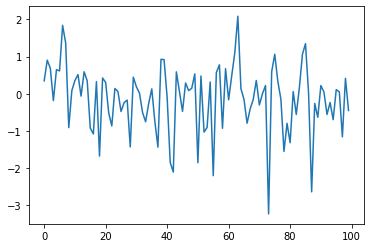

In [20]:
# generate some random noise
ϵ_values = np.random.randn(100)
plt.plot(ϵ_values)
plt.show()

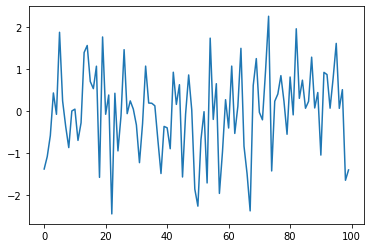

In [21]:
# illustration of a loop, list
ts_length = 100
ϵ_values = []

for i in range(ts_length):
    e = np.random.randn(1)
    ϵ_values.append(e)
    
plt.plot(ϵ_values)
plt.show()

In [22]:
a = [1, "3", True]
print(a)
type(a)
a.pop()
a.append(False)
print(a)
a[0]

[1, '3', True]
[1, '3', False]


1

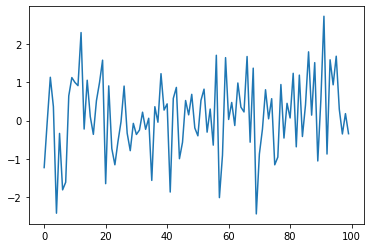

In [23]:
# while loop
ts_lenght = 100
ϵ_values = []
i = 0

while i < ts_length:
    e = np.random.randn()
    ϵ_values.append(e)
    i = i + 1

plt.plot(ϵ_values)
plt.show()

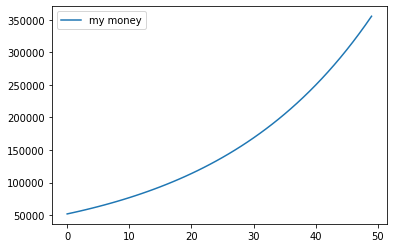

In [24]:
r = 0.04
T = 50
b = np.empty(T)
b0 = 50000

for t in range(T):
    b0 = b0 * (1 + r)
    b[t] = b0
    
plt.plot(b, label = 'my money')
plt.legend()
plt.show()

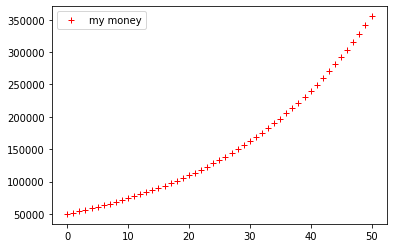

In [25]:
# alternatively
b = np.empty(T+1) # +1 because of the 0...
b[0] = 50000

for t in range(T):
    b[t + 1] = b[t] * (1 + r)
    
plt.plot(b, 'r+', label = 'my money')
plt.legend()
plt.show()

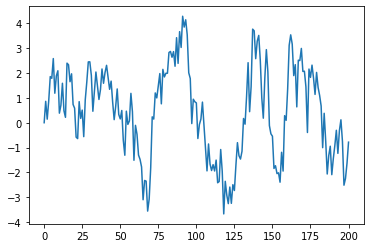

In [26]:
# Exercise 1
T = 200
α = 0.9
x = np.empty(T + 1)
x[0] = 0

for t in range(T):
    x[t + 1] = α * x[t] + np.random.randn()

plt.plot(x)
plt.show()

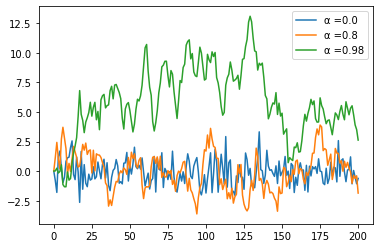

In [27]:
# Exercise 2
α = [0.00, 0.80, 0.98]

for i in α:
    x[0] = 0
    for t in range(T):
        x[t + 1] = i * x[t] + np.random.randn()
    plt.plot(x, label = 'α =' + str(i))

plt.legend()
plt.show()

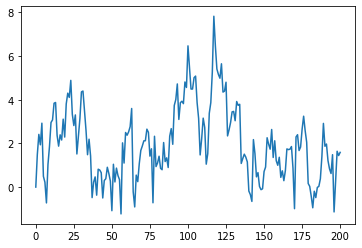

In [28]:
# Exercise 3
x[0] = 0

for t in range(T):
    x[t + 1] = 0.9 * abs(x[t]) + np.random.randn()
    
plt.plot(x)
plt.show()

In [29]:
range?
for i in range(4):
    print(i)

0
1
2
3


In [30]:
# Exercise 5
n = 100000

count = 0
for i in range(n):
    # create two univorm RVs
    u, v = np.random.uniform(), np.random.uniform()
    # distance from origin > 0.5 == in or outside unit circle?
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
    # index if d is in 
    if d < 0.5:
        # equivalent to count = count + 1
        count += 1

area_estimate = count / n

print(area_estimate * 4)

3.14588


# Functions

basic syntax: def function_name(arguments): body return (indentation matters)
- Any number of functions can be defined in a given file.
- Functions can be (and often are) defined inside other functions.
- Any object can be passed to a function as an argument, including other functions.
- A function can return any kind of object, including functions.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# full list of python built-in functions: https://docs.python.org/3/library/functions.html

In [44]:
# basic function syntax (super easy)
def f(x):
    return 2*x + 1

f(2)

5

In [57]:
# absolute function with ifelse like clause
def abs_value(x):
    x = x if x >= 0 else -x
    return x

print(abs_value(-1)) # if we don´t use print then only the last evaluation is shown...
print(abs_value(1))

1
1


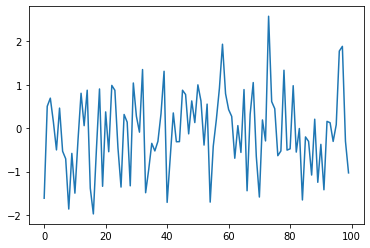

In [61]:
# from last lecture
def ts_random(n):
    ϵ_values = []
    for i in range(n):
        ϵ_values.append(np.random.randn())
    return ϵ_values
        
x = ts_random(100)
plt.plot(x)
plt.show()

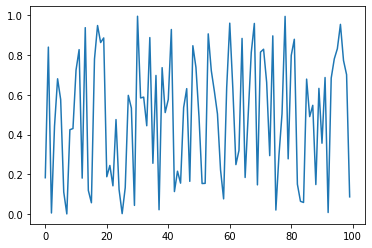

In [62]:
# adding a condition (as string!)
def ts_random(n, gen_type):
    ϵ_values = []
    for i in range(n):
        if gen_type == 'U':
            ϵ_values.append(np.random.uniform())
        else:
            ϵ_values.append(np.random.randn())
    return ϵ_values
        
x = ts_random(100, gen_type = 'U')
plt.plot(x)
plt.show()

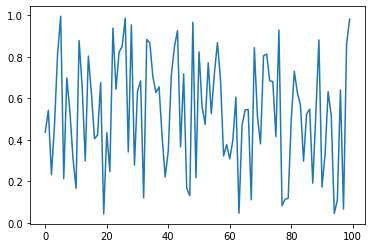

In [63]:
# pass gen_type as function
def ts_random(n, gen_type):
    ϵ_values = []
    for i in range(n):
        ϵ_values.append(gen_type()) # importantly, we have to set () after gen_type!
    return ϵ_values

x = ts_random(100, np.random.uniform)
plt.plot(x)
plt.show()

In [71]:
# Exercise 1
def factorial(x):
    x1 = x - 1
    while x1 > 0:
        x = x * x1
        x1 = x1 - 1
    return x

factorial(5)

120

In [ ]:
# Exercise 2
from numpy.random import uniform

# binomial = number of success in n reps with individual success prob of p
def binomial_rv(n, p):
    count = 0
    for i in range(n):
        success = 1 if uniform(0, 1) > p else 0
        count = count + success
    return count

binomial_rv(100, 0.5)

In [84]:
# Exercise 3 (only second part)
from numpy.random import uniform

def in_tot(k):
    head = [None] * 10
    for i in range(10):
        head[i] = 1 if uniform(1, 0) >= 0.5 else 0
    # check whether k 1s in head
    if sum(head) >= k:
        ret = 'winner, winner, chicken dinner'
    else:
        ret = 'looser'
    
    return ret

in_tot(1)        

'winner, winner, chicken dinner'

# Python Essentials

Own Summary:
- basic objects are
    - lists [] or list(), 
    - tuples () or tuple(), 
    - dictionaries {} or dict() (with key value pairs)
    - sets {} or set()
    - strings
- know how to access elements with [], enumerate over objects (preferred way with for loop and directly object), keys, etc.
- list comprehensions (mathematical way of building list)
- function docstring
- lambda functions

#### List and Tuple (and Strings)

In [91]:
# list
list_object = [1, 2, 'dog']
print(type(list_object), list_object)

# tuples = immutable lists
tuple_object = (1, 2, 'cat')
print(type(tuple_object), tuple_object)

<class 'list'> [1, 2, 'dog']
<class 'tuple'> (1, 2, 'cat')


In [92]:
# unpacking the above objects
x, y, z = list_object # same for tuple_object
print(x, y, z)

1 2 dog


In [102]:
# how to access elements of the objects above (slice)?
list_object[1:3] # recall that the first element has index 0

# The general rule is that a[m:n] returns n - m elements, starting at a[m].

# second last object
list_object[-2]

# all from second last object and higher
list_object[-2:]

[2, 'dog']

In [103]:
# works also for strings
string = 'banana'
string[-2:]

'na'

#### Sets and Dictionaries

In [108]:
# Dictionaries = named (instead of numbered) lists
dict_object = {'name' : 'Daniel', 'age' : 27} # keys (name and age) must be strings!
dict_object

{'name': 'Daniel', 'age': 27}

In [109]:
# access
dict_object['age'] # as string

27

In [117]:
# Sets are unordered collections without duplicates, and set methods provide the usual set-theoretic operations
set_object = {'a', 'b'}
type(set_object)

s1 = set_object
s2 = {'b', 'c'}

s1.issubset(s2)
s1.intersection(s2)

# create sets from sequences
s3 = set(('banana', 'apple', 'banana'))
print(type(s3), s3)

<class 'set'> {'banana', 'apple'}


#### Input and Output (reading and writing)

In [120]:
# check present wd
%pwd

'C:\\Users\\daniel.heimgartner\\Desktop\\Quant Econ'

In [121]:
f = open?

In [122]:
# write
f = open('newtextfile.txt', 'w') # w stands for writing
f.write('first line\n')
f.write('second line')
f.close()

# check in pwd: newtextfile.txt is created

In [123]:
# read
f = open('newtextfile.txt', 'r')
textfile = f.read()
print(textfile)

first line
second line


#### Iterating (over object)

In [134]:
# if an object is iterable we can directly loop over it
x = [1, 2, 3, 4]
for i in x:
    print(i)
    
# this is preferred to the indexed loop
for i in range(len(x)):
    print(x[i])

1
2
3
4
1
2
3
4


In [153]:
# The usefulness of enumerate is yet to be shown to me in a concrete example...
# if we actually need the index we can use enumerate()
enumerate?
# It allows us to loop over something and have an automatic counter.

0 5
1 6
2 7
3 8


In [157]:
# some enumerate examples
some_list = [5, 6, 7, 8]
for counter, value in enumerate(some_list):
    print(counter, value)

letter_list = ['a', 'b', 'c']
for index, letter in enumerate(letter_list):
    print(f"letter_list[{index}] = '{letter}'") # I guess {} makes a "break" in the string!

letter_list

x = ['hello', 'world']
for index, i in enumerate(x):
    x[index] = i + 'bla'
    print(x)

0 5
1 6
2 7
3 8
letter_list[0] = 'a'
letter_list[1] = 'b'
letter_list[2] = 'c'


['a', 'b', 'c']

#### List Comprehensions (set-builder notation)

In [141]:
# list comprehensions are an elegant tool to create lists (from existing lists)
animals = ['dog', 'cat', 'bird']
plurals = [animal + 's' for animal in animals] # recall that animal is the "uterative" element of animals
plurals

# or (range(8) goes from 0 to 7)
doubles = [2 * x for x in range(8)]
doubles

range(0, 8)


[0, 2, 4, 6, 8, 10, 12, 14]

#### More on Functions

In [142]:
# docstrings (function descriptions)
def f(x):
    """
    This function squares its arguments
    """
    return x**2
f(2)

4

In [143]:
# see the docstring (very nice)
f?

In [147]:
# double quotation marks returns even the source code
f??

In [149]:
# lambda to create one line functions
f = lambda x: x**2
f(3)

9

In [151]:
# Exercise 5 
# (mostly because of the nice function formatting...)
def linapprox(f, a, b, n, x):
    """
    Evaluates the piecewise linear interpolant of f at x on the interval
    [a, b], with n evenly spaced grid points.

    Parameters
    ==========
        f : function
            The function to approximate

        x, a, b : scalars (floats or integers)
            Evaluation point and endpoints, with a <= x <= b

        n : integer
            Number of grid points

    Returns
    =======
        A float. The interpolant evaluated at x

    """
    length_of_interval = b - a
    num_subintervals = n - 1
    step = length_of_interval / num_subintervals

    # === find first grid point larger than x === #
    point = a
    while point <= x:
        point += step

    # === x must lie between the gridpoints (point - step) and point === #
    u, v = point - step, point

    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)

# OOP I: Introduction to Object Oriented Programming

In contrast to the procedural paradigm, in the OOP paradigm data and functions are "bundled together" into "objects" (Functions in this context are referred to as methods). Python blends multiple paradigms but at its core **"everything is an object"**.

In [162]:
y = 2.5
id(y)

1439603172144

In [163]:
y = 2.5
id(y)

1439603172112

#### Methods

- Methods are functions that are bundled with objects (object.method)
- Methods typically act on the data contained in the object they belong to, or combine that data with other data
- **Important:** To check which methods are applicable for an object, just type the created object, followed by a dot and then the **tab key** (but does not depict all methods, right?) -> **dir(object)** can be used to access all the attributes!!
- Everything in memory is treated as an object (not only lists, tibbles, etc. but also functions, files, modules, etc.

In [191]:
x = [2.5, 3, 4]
callable(x.append)

True

In [192]:
# press: x.tabkey
dir(x)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

# OOP II: Building Classes
**Super Important Concept**

- As discussed an earlier lecture, in the OOP paradigm, **data and functions are bundled together into "objects"**.
- **Classes** are blueprints that help you build objects according to your own specifications.
- In Python, the data and methods of an object are collectively referred to as attributes. Attributes are accessed via "dotted attribute notation"
- Objects are important because they allow us to implement abstractions.
- (We can define new functions that take an object as an argument (or alternatively include the function as a method in the class..))

In [181]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
x = [1, 5, 4]
# sort(x) does not work -> OF COURSE NOT: you need to write: np.sort(a)!!!
x.sort(reverse = True)
print(x)
x.sort()
print(x)

[5, 4, 1]
[1, 4, 5]


#### Defining Your Own Classes

- For me, a `class` is like a unified collection of functions that act on an object...
- First, we will define a **consumer** class which can be modified by different methods.
- In Python, the data and methods of an object are collectively referred to as attributes.

In [3]:
# very cool
class Consumer:

    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
        self.wealth = w

    def earn(self, y):
        "The consumer earns y dollars"
        self.wealth += y

    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth

This class defines **instance data** `wealth` and **three methods**: `__init__`, `earn` and `spend`. *self* is actually necessary and enables the later use of Consumer.method calls...

In [5]:
# usage
c1 = Consumer(11)  # create instance with initial wealth 10
c1.spend?
c1.spend(5)
c1.wealth

6

In [205]:
c1.earn(20)
print(c1.wealth) # use tab key for feasible methods
c1.spend(26)

25
Insufficent funds


#### Example: The Solow Growth Model

let´s write a simple `class` to implement the Solow growth model:
- the object (instance) mantains track of the current capital stock in the variable `self.k`

there exists several methods that act on this object:
- the method `h` implements the RHS of the formula
- the method `updata` updates the capital stock with help of `h` according to the formula
- the method `steady_state` computes the steady state according to the formula by setting k+1 = k
- the method `generate_sequence` generates a time-series according to the formula (iteratively applies and updates k)

**Remark**: as seen in this example a class can easily be leveraged to compute time series data (with update method) according to some difference equation (model)

In [98]:
class Solow:
    """
    Implements the Solow growth model with the update rule

        k_{t+1} = [(s z k_t^α) + (1 - δ)k_t] /(1 + n)

    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock)
        "Initialize parameters and capital stock"
        self.n, self.s, self.δ, self.α, self.z, = n, s, δ, α, z
        self.k = k
        
    def h(self):
        "Implement RHS of formula"
        # unpack parameters
        s, z, k, α, δ, n = self.s, self.z, self.k, self.α, self.δ, self.n
        return ((s * z * k**α) + (1 - δ) * k) / (1 + n)
    
    def update(self):
        "Update the capital stock (leveraging method h)"
        self.k = self.h() # no return command here (quietly update)!
        
    def steady_state(self):
        "Compute st-st of economy"
        # unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        return ((s * z) / (n + δ))**(1 / (1 - α))
    
    def generate_sequence(self, t): # note the additional parameter here!
        "Generates capital stock time-series"
        path = []
        for i in range(t):
            path.append(self.k) # how do these two lines exactly work? -> see test class below (clear)...
            self.update() # recall, update basically overwrites (updates) self.k which then is appended in the next iteration
        return path

In [ ]:
s1 = Solow()
# s1. press tab key -> __init__ is not a method but initializes all the parameters (which in turn are methods...)

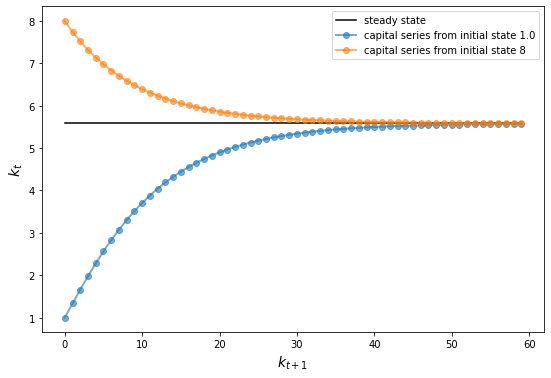

In [238]:
# Apply
# with prespecified parameters (in class definition)
s1 = Solow()
# with higher capital stock
s2 = Solow(k = 8)

T = 60

# steady state
fig, ax = plt.subplots(figsize = (9, 6))
ax.plot([s1.steady_state()] * T, 'k-', label = 'steady state')

# sequences
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw = 2, alpha = 0.6, label = lb)
    
ax.set_xlabel('$k_{t+1}$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

In [6]:
class Test:
    """
    understand the line in the for loop of the class Solow, method generate_sequence
    """
    def __init__(self, s = 10, a = 3):
        self.s = s
        self.a = a
    
    def add(self):
        "Add a to the starting value s"
        self.s = self.s + self.a
        return self.s
    
    def test(self, t):
        "Generates sequence by iteratively overwriting s"
        test = []
        for i in range(t):
            test.append(self.s)
            self.add() # adds a to s (-> new s; overrides self.s!) which is then appended in the next! loop
        return test

In [7]:
t = Test(s = 0, a = 0)
t.test(20)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#### Example: A Market

- 1 good economy where all agents are price takers
- a linear demand curve
- a linear supply curve (the firm has to pay tax)

Methods to include:
- equilibrium `price` and `quantity`
- `consumer_surp` and `producer_surp`
- tax revenue `tax_rev`
- inverse demand and supply `inv_demand`, `inv_supply`
- tax absent case `inv_supply_no_tax`

**Good example to understand how methods can be referred to within methods**

In [319]:
# to compute areas under surface (consumer and producer surplus)
from scipy.integrate import quad

class Market:
    """
    Simulates a simple one good market economy where producers are taxed
    AD: Q = ad - bd * p
    AS: Q = az - bz * (p - tax)
    """
    def __init__(self, ad, bd, az, bz, tax):
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insufficient Demand.')
            
    def price(self):
        "Computes equilibrium price"
        # unpack params
        ad, bd, az, bz, tax = self.ad, self.bd, self.az, self.bz, self.tax
        return (ad - az + bz * tax) / (bz + bd)
    
    def quant(self):
        "Computes eq quant"
        # plug in self.price in demand (or supply) -> method referred to in method
        return self.ad - self.bd * self.price()
    
    def cons_surp(self):
        "Computes consumer surplus (= area under invers demand curve)"
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x # inv. demand (where x is the quantity)
        area, error = quad(integrand, 0, self.quant()) # upper bound == self.quantity()!! 
        # see function documentation: first output argument (as dictionary) = integral, second = estimated error
        return area - self.price() * self.quantity()
    
    def prod_surp(self):
        "Computes producer surplus (= area under inverse supply curve)"
        integrand = lambda x: -(self.az / self.bz) + (1 / self.bz) * x
        area, error = quad(integrand, 0, self.quant())
        return (self.price() - self.tax) * self.quant() - area
    
    def tax_rev(self):
        "Computes tax revenue"
        return self.tax * self.quant()
    
    def inv_demand(self, x):
        "Computes inverse demand"
        return self.ad / self.bd - (1 / self.bd) * x
    
    def inv_supply(self, x):
        "Computes inverse supply"
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax
    
    def inv_supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
        return -(self.az / self.bz) + (1 / self.bz) * x

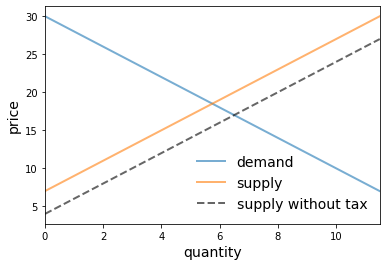

In [320]:
# Baseline ad, bd, az, bz, tax
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params) # !! the * to initialize all the params

q_max = m.quant() * 2
# quantity grid
q_grid = np.linspace(0.0, q_max, 100)
# for each grid point compute price demand, price supply
pd = m.inv_demand(q_grid)
ps = m.inv_supply(q_grid)
# supplier price in absence of taxes (again for each grid point)
psno = m.inv_supply_no_tax(q_grid)

# plot
# initiate plot "ax"
fig, ax = plt.subplots()
# add inverse demand
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
# add inverse supply with and without tax
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')
# set information (aes)
ax.set_xlabel('quantity', fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('price', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14)
plt.show()

**very neat**: we now can create a **function** for applied on an "Market" **object** / instance (so the object is actually the argument) that computes the deadweight. We could alternatively write a method in the class definition...

In [316]:
def deadw(m):
    "Computes deadweight loss for market m."
    # == Create analogous market with no tax == #
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0)
    # == Compare surplus, return difference == #
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()
    surp2 = m.consumer_surp() + m.producer_surp() + m.taxrev()
    return surp1 - surp2

In [318]:
# deadw is a function!
deadw?

#### Special Methods

Predefined methods `__name__` that have a special meaning:
- For example the `__len__` special method enables an object to be passed to the len(object) function and returns the "length" of the object.
- Or the special method `__call__` which makes your object callable like a function object() and returns whatever you defined in the `__call__` method.

In [8]:
# Exercise 1 
# (only copy pasted; but it makes the point for __call__ special method very nicely)
class ECDF:
    """
    Computes the empirical cumulative distribution function for any instance data
    """
    def __init__(self, observations):
        self.observations = observations

    def __call__(self, x):
        counter = 0.0
        for obs in self.observations:
            if obs <= x:
                counter += 1
        return counter / len(self.observations)

In [11]:
# == test == #

from random import uniform

# create sample (data instance, observations)
samples = [uniform(0, 1) for i in range(10)]

# creates an object of class ECDF
F = ECDF(samples)

# evaluate ecdf at x = 0.5 (object is callable!)
print(F(0.5))

# overwrite observations in the object with a new sample
F.observations = [uniform(0, 1) for i in range(1000)]

print(F(0.5))

0.4
0.494


IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
# The Scientific Libraries
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

# Python for Scientific Computing

- "For example, it’s almost always better to use an existing routine for root finding than to write a new one from scratch."
- Concept of **Vectorization** (speed): is the process of converting an algorithm from operating on a single value at a time to operating on a set of values at one time. Many operations can be vectorized...
- There exist many so-called universal functions (f.ex. when you call functions from NumPy) that implement the concept of vectorization (f.ex. by working element wise on vectors / arrays). **General Remark**: don´t use loops when not necessary
- The big (4 + 1) 5 in the scientific ecosystem: `NumPy`, `SciPy`, `Matplotlib`, `Pandas` (and `Numba`)

**Overview:**
- NumPy forms the foundations by providing a basic array data type (think of vectors and matrices) and functions for acting on these arrays (e.g. matrix multiplication).
- SciPy builds on NumPy by adding the kinds of numerical methods that are routinely used in science (interpolation, optimization, root finding, etc.).
- Matplotlib is used to generate figures, with a focus on plotting data stored in NumPy arrays.
- Pandas provides types and functions for empirical work (e.g., manipulating data).
- Numba accelerates execution via JIT compilation — we’ll learn about this soon.

# NumPy

- library for numerical programming (here: numerical as opposed to f.ex. text...)
- NumPy arrays and its operations (for fast array processing)
- if `import numpy as np` stands in the cell, you can use np. + tab key to access subpackages and functions (f.ex. np.zeros is a function, whereas np.random is a subpackage containing more functions s.a. np.random.randn...
- another useful subpackage is `linalg` for f.ex. matrix inversion or computation of determinants,... (SciPy has also a package linalg)

#### NumPy Arrays
- somewhat similar to native Python lists with the difference that all elements must be of the same data type (`dtypes` provided by Numpy)
- dtypes are f.ex. integers, floats, etc.
- you have to give the np.array the dimension manually
- `np.arrays` (can also be created from lists and tuples)
- `np.zeros`, `np.ones`, `np.empty`, `np.linspace` (grid of evenly spaced numbers = **grid**), `np.identity` or `np.eqe`
- operations `+, -, *, \, **` all act **elementwise**! If A and B are both 2D arrays (matrices) it follows that `A * B` is not the matrix product!
- use `@` for matrix multiplication or inner product (if vectors)
- **Careful:** when you mute an array and assign a "copy" (of a) of the array to a new name b and mute (change) an element of b, then that element is also changed in a!
- **"Solution":** if you want to make an independent copy, use `np.copy()`
- **Very nice:** use `np.vectorize()` in order to vectorize user defined functions

In [15]:
import numpy as np

In [19]:
# create an empty np.array of zeros
a = np.zeros(3)
print(a)
print(type(a))
print(type(a[0]))

[0. 0. 0.]
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [20]:
# specify element type (dtype) manually
a = np.zeros(3, dtype = int)
print(type(a[0]))

<class 'numpy.int32'>


**General remark:** press `shift + tab` to get function arguments

In [23]:
# shape and dimension
a = np.zeros(10)
a.shape

(10,)

In [24]:
a.shape = (2,5)
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [27]:
a[1,1] = 5
a

array([[0., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0.]])

In [30]:
# np.linspace
np.linspace(0, 10, 20) # (press shift + tab after np.linspace)

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [40]:
# np.array
a = np.array([10, 20, 30, 40])
b = np.array((10, 20, 30, 40)) # equivalently with round brackets (tuple)
print(a)
print(b)

[10 20 30 40]
[10 20 30 40]


In [38]:
a.shape = (2,2)
a

array([[10, 20],
       [30, 40]])

In [50]:
# 2D (matrix-) array (from a list of lists)
z = np.array([[1, 2], [3, 4]])
print(z)
z.shape

[[1 2]
 [3 4]]


(2, 2)

#### Array Indexing
- very intuitive
- use [] brackets to index
- you can use other arrays (f.ex. an index array or a boolean array) to index an array
- you can overwrite elements

In [43]:
z = np.linspace(1, 10, 10)
z

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [46]:
z[3] = 7 # zero based indexing!
z

array([ 1.,  2.,  3.,  7.,  5.,  6.,  7.,  8.,  9., 10.])

In [49]:
index = np.array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0], dtype = bool)
z[index]

array([2., 3., 8., 9.])

In [54]:
# index rows (or cols) in a 2D array
z = np.linspace(1, 10, 10)
z.shape = (2, 5)
z[0, :]

array([1., 2., 3., 4., 5.])

In [56]:
z[:,:] = 0
z

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

#### Array Methods
- s.a. `np.sum()`, `np.sort()`, `np.cumsum()`, `np.var()`, `np.searchsorted()`, etc.
- many (but not all - vgl. sort - of the methods discussed above have equivalent functions in the NumPy namespace -> np.sum(a)

In [68]:
import numpy as np
# np. + press tab (works only if import statement is in cell - cell needs not to be run first...)
z = np.linspace(1, 10, 10)
z[9] = 0.5
z.sort()
z

array([0.5, 1. , 2. , 3. , 4. , 5. , 6. , 7. , 8. , 9. ])

In [69]:
# equivalently with function instead of method
z = np.linspace(1, 10, 10)
z[9] = 0.5
a = np.sort(z)
a

array([0.5, 1. , 2. , 3. , 4. , 5. , 6. , 7. , 8. , 9. ])

#### Additional Functionality
- most of np functions are vectorized -> `ufuncs` (universal functions) = they act elementwise
- not all user defined functions work element wise -> error will be returned when applying to an array
- **Very nice:** use `np.vectorize()` to vectorize a user defined function
- `np.where()` is also useful

In [74]:
x = np.random.randn(10)
np.where(x > 1, 100, x)

array([-5.69066642e-01,  1.00000000e+02,  2.80531502e-01,  1.00000000e+02,
        1.00000000e+02,  6.88872339e-01, -4.06602915e-01, -2.05600586e-02,
        6.38776548e-02, -3.26002249e-01])

In [75]:
# useful for extraction
a = np.linspace(0, 10, 11)
b = a > 5
print(b)
c = a[b]
print(c)

[False False False False False False  True  True  True  True  True]
[ 6.  7.  8.  9. 10.]


In [83]:
# Exercise 2
import numpy as np
# use np.searchsorted and np.cumsum

def sample(q):
    a = 0 # lower bound
    U = np.random.uniform(0, 1)
    q = np.asarray(q) # make sure that q is an array
    index = np.searchsorted(q, U)
    q = q[0:index]
    return np.cumsum(q)

class DiscreteRW:
    """
    q is the probability vecotor and the instance data of the class. The Method draw(k) returns an array of k random variables.
    """
    def __init__(self, q):
        self.q = q
        
    def draw(self, q, k):
        # unpack params
        q, k = self.q, self.k
        np.vectorize(sample)

In [102]:
from numpy import cumsum
from numpy.random import uniform

class DiscreteRV:
    """
    Generates an array of draws from a discrete random variable with vector of
    probabilities given by q.
    """

    def __init__(self, q):
        """
        The argument q is a NumPy array, or array like, nonnegative and sums
        to 1
        """
        self.q = q
        # self.Q = cumsum(q) this yields a problem when updating q as in next sell (Q is not updated...)

    def draw(self, k=1):
        """
        Returns k draws from q. For each such draw, the value i is returned
        with probability q[i].
        """
        Q = cumsum(self.q) # see remark above -> that´s why we init. Q here
        return self.Q.searchsorted(uniform(0, 1, size=k))

In [101]:
q = (0.1, 0.9)
d = DiscreteRV(q)
d.q = (0.5, 0.5)
print(d.q)
print(d.Q)
print(np.cumsum(q))
print(np.cumsum((0.5, 0.5)))

(0.5, 0.5)
[0.1 1. ]
[0.1 1. ]
[0.5 1. ]


In [104]:
d.draw(k = 10)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

**Open Question (probably not too relevant):** when defining a method in a class, can we define a function within the method and then call the function (like when writing a nested function?)? Can we use a function within a method which is defined outside the class?

# Matplotlib
- `fig, ax = plt.subplots()` returns a pair and both `fig` and `ax` are **classes / instances** with different **methods**!
- F.ex. `ax.plot()` is a method applicable to the ax object
- **Explore:** by `. + tab-key` (only works if the object have been initialized befor = command has been run...)
- The plots are built layer by layer -> f.ex. you define in ax.plot(..., label = 'bla') the label but you need to add the line (method) `ax.legend()` to explicitly plot it!
- The layers are added via methods supplied to ax -> `as. + tab-key`
- You can easily define a `subplot()` function that initializes the plot via `fig, ax = plt.subplots()` makes modifiactions to via different layers (ax.method) and returns `return fig, ax`.
- **Further Readings:** 
    - The [Matplotlib gallery](https://matplotlib.org/gallery.html) provides many examples.
    - A nice [Matplotlib tutorial](http://scipy-lectures.org/intro/matplotlib/index.html) by Nicolas Rougier, Mike Muller and Gael Varoquaux.
    - [mpltools](http://tonysyu.github.io/mpltools/index.html) allows easy switching between plot styles.
    - **Promising:** [Seaborn](https://github.com/mwaskom/seaborn) facilitates common statistics plots in Matplotlib.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# plt. + tab key

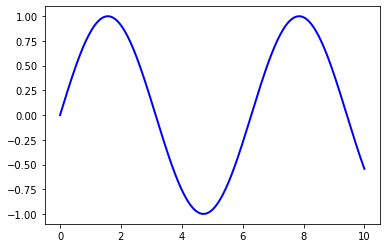

In [110]:
x = np.linspace(0, 10, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'b-', linewidth = 2)
plt.show()

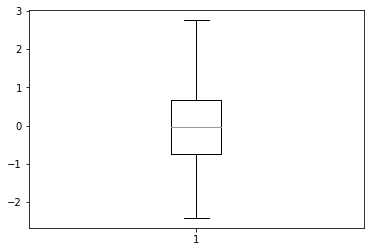

In [112]:
fig, ax = plt.subplots()
ax.boxplot(np.random.randn(100))
plt.show()

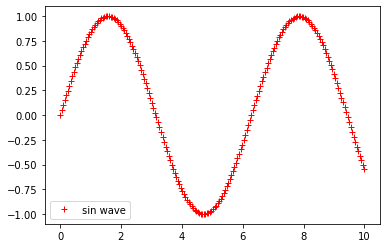

In [116]:
# explicitly add a legend
fig, ax = plt.subplots()
ax.plot(x, y, 'r+', label = 'sin wave')
ax.legend() # without this line, the label 'sin wave is not plotted'; add parameters (similar to ggplot)
plt.show()

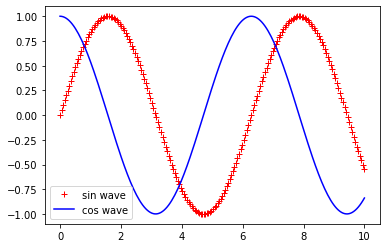

In [118]:
# multiple plots
z = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r+', label = 'sin wave')
ax.plot(x, z, 'b-', label = 'cos wave')
ax.legend()
plt.show()

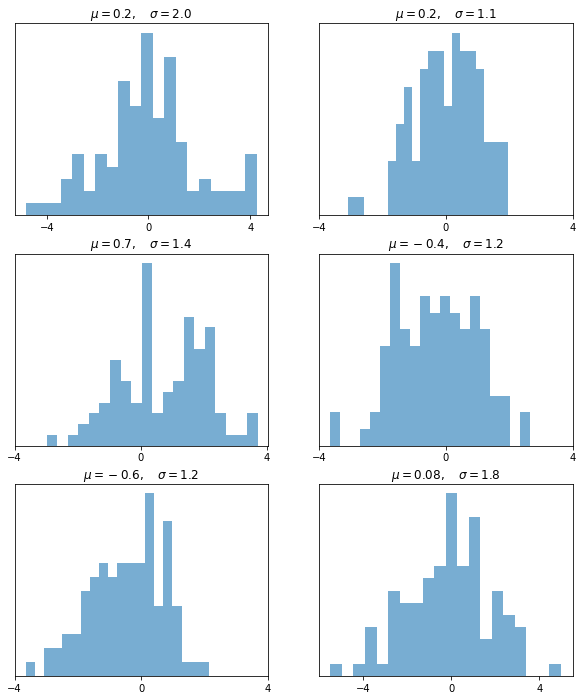

In [126]:
from scipy.stats import norm
from random import uniform

num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))

# loop over the subplot matrix
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20) # method applies to axes (see above axes instead of ax...)
        t = f'$\mu = {m:.1}, \quad \sigma = {s:.2}$' # see below: title = t (0.2 stands for two decimals); don´t get the syntax fully
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

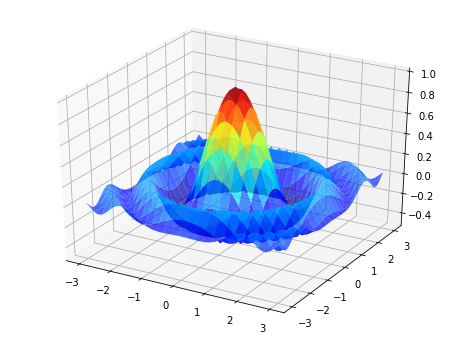

In [127]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()

# SciPy
- Builds on top of NumPy
- Common tools for:
    - Linear Algebra
    - Numerical Integration
    - Interpolation
    - Optimization
    - Distributions and random number generator
    - etc.
- Useful functionality in SciPy comes in sub-packages s.a. `scipy.stats`, `scipy.optimize`, `scipy.integrate`, `scipy.linalg`, etc.
- These sub-packages are explored below (with summary)

#### `scipy.stats`
- Full documentation of [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-functions-scipy-stats)
- Numerous RV objects (s.a. densities, cdf, random sampling, etc.)
- Some estimation procedures
- Some statistical tests
- F.ex. we can create a RV object (instance) and apply different methods on it, s.a. random variable sampling `.rvs` etc.
- `linregress` is also a function from the sub-package

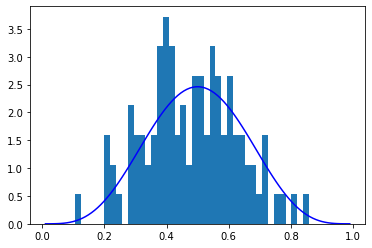

In [132]:
# substitutes np.random
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline

# creates a continuous RV object -> methods can be applied to that object (s.a. method rvs)
beta?
q = beta(5, 5) # alternatively, you can initialize the RV object without parameters: q = beta() and then supply 5,5 in q.rvs or another method...
obs = q.rvs(100)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins = 40, density = True)
ax.plot(grid, q.pdf(grid), 'b-')
plt.show()

The general syntax for creating these objects that represent distributions (of type rv_frozen) is `name = scipy.stats.distribution_name(shape_parameters, loc=c, scale=d)`

In [143]:
from scipy.stats import linregress # you can also press tab-key after import

# generate a relationship
x = np.linspace(0, 100, 100)
y = 0.4 + 0.7 * x + np.random.randn(len(x))

# linregress + shift + tab-key
slope, intercept, rval, pval, stderr = linregress(x, y)
slope, intercept

(0.7022167989888299, 0.4725471180735852)

#### `scipy.optimize`: Roots and Fixed Points
- Full documentation of [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)
- A **root** or **zero** of a function is the vector (point) in the domain where the function evaluates to 0.
- A **fixed point** of a function is a vector in the domain s.a. the function evaluated at that point maps it to itself (f(x) = x)
- The fixed point of a function f(x) is the root of the function g(x) = x - f(x)
- Different methods to numerically approx. the root (as discussed in Dynamic Macro) s.a. bisection, newton-raphson, etc.
- Call f.ex. `from scipy.optimize import bisect`
- Multivariate root-finding: `scipy.otpimize.fsolve`
- Fixed point: `scipy.optimize.fixed_point` or from scipy.optimize import fixed_point.


In [144]:
# define function for testing
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
x = np.linspace(0, 1, 100)
y = f(x)

In [145]:
# own bisection function
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        if f(middle) > 0:   # root is between lower and middle
            lower, upper = lower, middle
        else:               # root is between middle and upper
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

In [146]:
# compare
bisect(f, 0, 1)

0.408294677734375

In [147]:
from scipy.optimize import bisect
bisect(f, 0, 1)

0.4082935042806639

#### `scipy.optimize`: Optimization
- **Minimization is closely related to root-finding:** For smooth functions, interior optima correspond to roots of the first derivative.
- `fminbound` for constrained **univariat** optimization
- Several functions for **multivariate** optimization (see [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html))

In [148]:
# f.ex.
from scipy.optimize import fminbound
fminbound(lambda x: x**2, -1, 2)

0.0

#### `scipy.integrate`
- Full documentation of [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html)
- Most numerical integration methods work by computing the integral of an approximating polynomial.
- For univariate functions use: `from scipy.integrate import quad` (or fixed_quad)

#### `scipy.linalg`
- Full documentation of [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html)
- More powerful than the equally named library of NumPy
- For solving systems of linear equations, eigenvalue decompositions, matrix functions, etc.

In [151]:
# for system of linear equations
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
from scipy import linalg
x = linalg.solve(a, b)
x

array([ 2., -2.,  9.])

# Numba
- Vecorization has its limit
- Numba works with the concept of **Just in time compilation** (JIT) which is more memory efficient than vectorization
- Numba will be a key part of our lectures — especially those lectures involving dynamic programming
- Numba is basically a JIT compiler that f.ex. infers the type of a function argument
- (Create a jit-compiled version of a function with `numba.jit(function_name)`)
- But usually it is done with the **Decorator Notation** `@jit` in the function definition (still, jit needs to be imported from numba first)
- Don´t blanket your code with @jit statements!
- **Take away:** 
    - JIT infers type
    - JIT implementation is very easy by putting `@njit` in front of a function definition
    - JIT implementation is also possible for **class** definitions (there you have to define the instance data type first)
    - Careful with global variables in "jit-ed" functions: does not overwrite global variable after you changed that very variable!
    - There is also a `@vectorize` decorator in numba to create ufuns (vectorized functions)

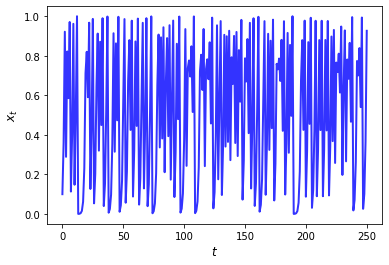

TOC: Elapsed: 0:00:26.63
26.63985514640808


In [158]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline

α = 4

def qm(x0, n):
    x = np.empty(n+1)
    x[0] = x0
    for t in range(n):
      x[t+1] = α * x[t] * (1 - x[t])
    return x

x = qm(0.1, 250)
fig, ax = plt.subplots()
ax.plot(x, 'b-', lw=2, alpha=0.8)
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$x_{t}$', fontsize = 12)
plt.show()

from numba import jit
qm_numba = jit(qm)

# compare runtimes
n = 10_000_000
qe.tic()
qm(0.1, n)
time1 = qe.toc()
print(time1)

In [161]:
qe.tic()
qm_numba(0.1, n)
time2 = qe.toc()
print(time2)

TOC: Elapsed: 0:00:0.23
0.23427557945251465


#### Decorator Notation
- How to make a function "jit compilable"
- Use `@jit` in the function definition
- If we want to control whether or not effective compilation is achievable we use either `@jit(nopython=True)` or, equivalently, `@njit` instead of `@jit`.

In [ ]:
from numba import njit

@njit
def qm(x0, n):
    x = np.empty(n+1)
    x[0] = x0
    for t in range(n):
        x[t+1] = α * x[t] * (1 - x[t])
    return x

# equivalent to jit(qm)

#### Compiling Classes
- Use `@jitclass` from numba
- `from numba import jitclass, float64`, then define the type of the instance data (f.ex. `solow_data = []` as list), and as a last step put `@jitclass(solow_data)` before the class definition

In [ ]:
from numba import jitclass, float64

# f.ex. from our Solow growth model implementation
solow_data = [
    ('n', float64),
    ('s', float64),
    ('δ', float64),
    ('α', float64),
    ('z', float64),
    ('k', float64)
]

@jitclass(solow_data)
# here follows a regular class definition...

**Hint:** you can also learn about Markov-chains in later chapters (interesting!)

# Parallelization
- Speed gains...
- Implementable again through the `numba` package -> flags in function decorators and other minor adjustments (see below)
- Multiprocessing vs. Multithreaing (one shared memory space)
- We mostly use multithreading
- Use f.ex. `@vectorize('float64(float64, float64)', target='parallel')` in order to vectorize the function `f(x,y)` where we specify in the bracket after @vectorize that dependent and both independent variables are floats and set `target = 'parallel'`
- Or do: add the `parallel=True` flag in the `@njit decorator` and change range to `prange` (in the loop) within the function
- **Careful** in nested loops -> don´t use prange if the inner loop depends on the outer loop!

# Pandas
- Python´s dplyr
- Defines fundamental **structures** for working with data and endows them with **methods** s.a.
    - reading in data
    - adjusting indices
    - working with dates and time series
    - sorting, grouping, re-ordering and general data munging [1]
    - dealing with missing values, etc., etc.
- More sophisticated statistical functionality is left to other packages, such as `statsmodels` and `scikit-learn`, which are built on top of pandas.
- Two important data types: `Series` (think of 1 column; buit on top of np.arrays -> directly apply np.functions to Series...) and `DataFrames`
- One of the nice things about pandas DataFrame and Series objects is that they have methods for plotting and visualization that work through **Matplotlib**:
    - `ax = df['population'].plot(kind = 'bar')` followed by `plt.show()` (compare with Matplotlib section - where we first initialized the plot and then ax.plot(data, specification, etc.)

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

#### Series
- pd.Series are more flexible and provide even additional functionality than np.arrays, f.ex.:
    - `.describe()`
    - or additional possibilities for indexing via `.index = ['name1', 'name2', etc.]`

In [167]:
s = pd.Series(data = np.random.randn(4), name = 'daily returns')
print(type(s))
s

<class 'pandas.core.series.Series'>


0    0.082116
1    2.242805
2    0.843182
3    0.173679
Name: daily returns, dtype: float64

In [169]:
# you can directly apply np.functions to series
np.min(s)

0.08211642028657887

In [170]:
# pd.Series provide additional methods (flexibility) compared to np.arrays...
s.describe()

count    4.000000
mean     0.835445
std      0.997691
min      0.082116
25%      0.150788
50%      0.508430
75%      1.193087
max      2.242805
Name: daily returns, dtype: float64

In [174]:
# set index of the series
s.index = ['AMAZ', 'AAPL', 'UBS', 'MSF']
print(s)
s['MSF']

AMAZ    0.082116
AAPL    2.242805
UBS     0.843182
MSF     0.173679
Name: daily returns, dtype: float64


0.17367861690914332

#### DataFrames
- very intuitive
- `pd.read_csv` read a .csv file
- different possibilities to index:
    - `.iloc` indexing both rows and cols using integers
    - `.loc` indexing both rows and cols using mixture of integers and labels
- `df.set_index('column_name')`
- `df.columns = 'name1', 'name2'` change col names
- construct new column (out of exisitng ones)
- `df.sort_values()`
- `df.groupby()` similar to dplyr group_by!
- etc.


In [215]:
df = pd.read_csv('test_pwt.csv')
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [216]:
# select rows
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [217]:
# select cols by name
df[['country', 'year', 'POP']]

,country,year,POP
0,Argentina,2000,37335.653
1,Australia,2000,19053.186
2,India,2000,1006300.297
3,Israel,2000,6114.570
4,Malawi,2000,11801.505
5,South Africa,2000,45064.098
6,United States,2000,282171.957
7,Uruguay,2000,3219.793


In [218]:
# index
df.iloc[0:3, 0:5]

,country,country isocode,year,POP,XRAT
0,Argentina,ARG,2000,37335.653,0.99950
1,Australia,AUS,2000,19053.186,1.72483
2,India,IND,2000,1006300.297,44.94160


In [219]:
# index
df.loc[0:3, ['country', 'POP']]

,country,POP
0,Argentina,37335.653
1,Australia,19053.186
2,India,1006300.297
3,Israel,6114.570


In [220]:
# df.index...
df.loc[df.index[0:3], ['country', 'POP']]

,country,POP
0,Argentina,37335.653
1,Australia,19053.186
2,India,1006300.297


In [221]:
df.index

RangeIndex(start=0, stop=8, step=1)

In [222]:
df = df[['country', 'POP', 'tcgdp']]
df = df.set_index('country')
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


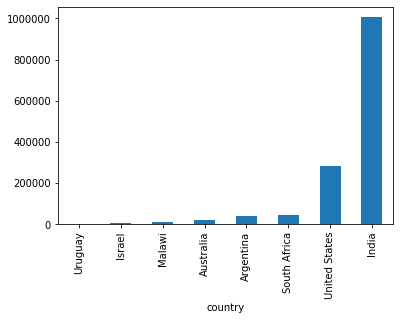

In [226]:
df = df.sort_values(by = 'population')
ax = df['population'].plot(kind = 'bar')
plt.show()

#### Online Data Sources
- Accessing data with `requests` package
- Or using `pandas_datareader`

#### `requests`

In [233]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
data = pd.read_csv(url, index_col = 0, parse_dates = True)
data

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2019-11-01,3.5
2019-12-01,3.5
2020-01-01,3.6


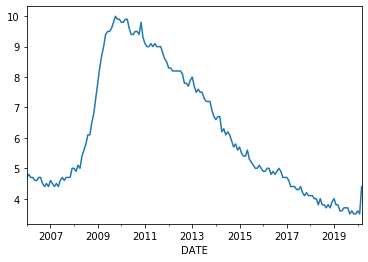

In [234]:
ax = data['2006':'2020'].plot(legend = False)
plt.show()

#### `pandas_datareader`
- [Documentation](https://pandas-datareader.readthedocs.io/en/latest/index.html)
- Access FRED, OECD, Eurostat, Worldbank, etc.
- F.ex. start with `from pandas_datareader import wb` or `import data`
- `faodata` is a package that let´s you access the fao database

In [273]:
# Exercise 1
import datetime as dt
from pandas_datareader import data

# ticker dictionary
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

# define function
def read_data(ticker_list,
             start = dt.datetime(2019, 1, 1),
             end = dt.datetime(2020, 3, 1)):
    """
    Reads in closing prices from Yahoo for the timerange defined
    """
    ticker = pd.DataFrame()
    
    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices
        
    return ticker

In [254]:
# apply function
df = read_data(ticker_list)

In [262]:
# calculate percentage price change
first_obs = df.iloc[0] # series
last_obs = df.iloc[-1] # series
change = (last_obs - first_obs) / first_obs * 100

In [263]:
change

INTC    17.926929
MSFT    60.215576
IBM     12.967620
BHP     -9.506893
TM      12.444102
AAPL    73.100297
AMZN    22.390571
BA     -15.039688
QCOM    36.411152
KO      13.978268
GOOG    28.061384
SNE     27.668307
PTR    -35.872597
dtype: float64

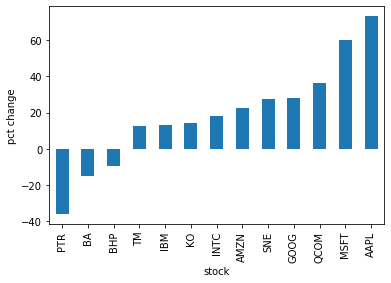

In [265]:
# plot as bargraph
change = change.sort_values()
ax = change.plot(kind = 'bar')
ax.set_xlabel('stock')
ax.set_ylabel('pct change')
plt.show()

In [285]:
# Exercise 2
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
    
indices_data = read_data(indices_list,
                         start = dt.datetime(1990, 1, 2),
                         end = dt.datetime(2020, 1, 31))

In [299]:
# what does the items method do:
# for sym, name in indices_list.items():
    # print(sym)
    # print(name)

**Here** we use the `groupby` method!

In [304]:
yearly_returns = pd.DataFrame()

# we iterate over sym = over cols!
for sym, name in indices_list.items():
    # indices_data.index -> get index column which is a date -> .year group by year...
    p1 = indices_data.groupby(indices_data.index.year)[sym].first()
    p2 = indices_data.groupby(indices_data.index.year)[sym].last()
    returns = (p2 - p1) / p1
    yearly_returns[name] = returns
    
yearly_returns.describe()

,S&P 500,NASDAQ,Dow Jones,Nikkei
count,31.000000,31.000000,31.000000,31.000000
mean,0.083899,0.131635,0.083763,0.005233
std,0.164331,0.271961,0.143217,0.225798
min,-0.375847,-0.401978,-0.327168,-0.396770
25%,-0.010572,-0.008965,-0.011169,-0.167687
50%,0.110019,0.139988,0.084039,0.009353
75%,0.196538,0.306769,0.214162,0.148653
max,0.341574,0.842943,0.333111,0.524246


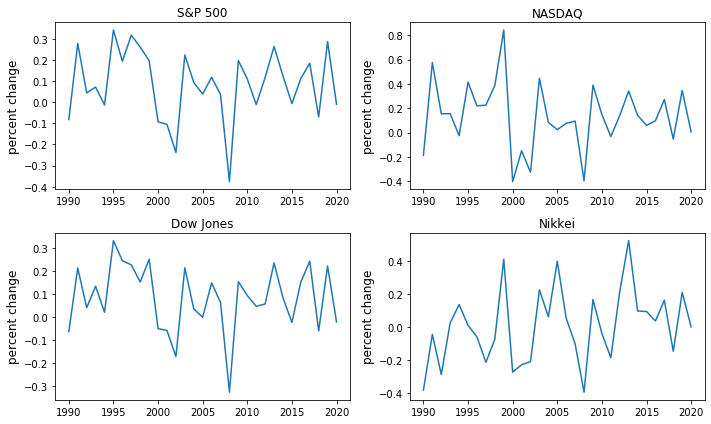

In [303]:
# plot
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for iter_, ax in enumerate(axes.flatten()):            # Flatten 2-D array (of axes) to 1-D array
    index_name = yearly_returns.columns[iter_]         # Get index name per iteration
    ax.plot(yearly_returns[index_name])                # Plot pct change of yearly returns per index
    ax.set_ylabel("percent change", fontsize = 12)
    ax.set_title(index_name)

plt.tight_layout()

IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
# Advanced Python Programming
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [1]:
# maybe start with a short recap...

**General Remark:** Be aware when methods are applicable (which implies that we can use the . notation) or when we have to make a function call. It´s quite intuitive: f.ex. when you have a numpy array or a pandas dataframe then there are many methods applicable to such an opbject. Methods can often also be called as functions...